In [1]:
import glob
files = glob.glob("sampleCaptchas/input/*.jpg")

In [2]:
import cv2
import random
import numpy as np
import json

img_file = random.choice(files)
image_bgr = cv2.imread(img_file)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

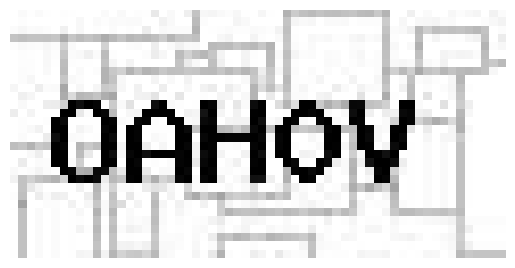

In [3]:
import matplotlib.pyplot as plt

plt.imshow(image_rgb)
plt.axis('off')
plt.show()

In [4]:
## synthetic
pred_files = glob.glob("results/*.json")
all_x, all_y, all_w, all_h = [], [], [], []
for pred_file in pred_files:
    with open(pred_file) as f:
        res = json.load(f) 
        x, y, w, h = res['rec_boxes'][0]
        all_x.append(x)
        all_y.append(y)
        all_w.append(w)
        all_h.append(h)

all_x = np.array(all_x)
common_x = np.argmax(np.bincount(all_x))

all_y = np.array(all_y)
common_y = np.argmax(np.bincount(all_y))

all_w = np.array(all_w)
common_w = np.argmax(np.bincount(all_w))

all_h = np.array(all_h)
common_h = np.argmax(np.bincount(all_h))

print("x, y, w, h : ", common_x, common_y, common_w, common_h)

x, y, w, h :  3 8 50 23


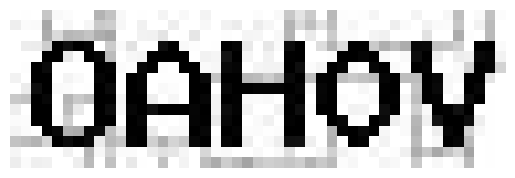

In [5]:
cropped_img = image_rgb[common_y:common_h, common_x:common_w]


plt.imshow(cropped_img)
plt.axis('off')
plt.show()
# cv2.imwrite("cropped_img.jpg", cropped_img)

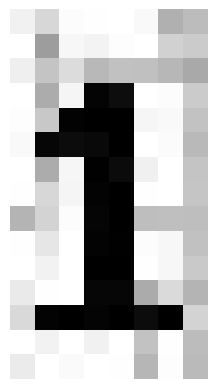

In [6]:
character_file = random.choice(glob.glob("characters_library/*.jpg"))
character_img = cv2.imread(character_file)
plt.imshow(character_img)
plt.axis('off')
plt.show()